In [92]:
#loading packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sp
import seaborn as sns

In [93]:
#import data sets
df_ws = pd.read_csv('all_players_data.csv', index_col=False, header=0)
df_tm = pd.read_csv('player_data_Sept2017.csv', index_col=0, parse_dates=True)

In [94]:
df_ws.rename(columns={'Goals/90min': 'GpG'}, inplace=True)
df_ws.rename(columns={'DrB (off)': 'DrBoff'}, inplace=True)

In [95]:
df_ws.head()

,Player Name,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
0,Cesar Azpilicueta,0.13,0.34,0.07,0.0,0.3,84.4,7.28,2.4,1.5,...,0.1,0.3,0.5,60.4,0.3,2.5,0.1,0.1,0.1,0.1
1,N Golo Kante,0.1,0.0,0.1,0.0,0.7,86,7.34,3.4,2.1,...,0.1,1,1.2,54.1,0.2,2,0,0.5,0,0.2
2,Tiemoue Bakayoko,0.17,0.25,0.25,0.0,1.3,83.5,7.21,2.9,1.4,...,0.1,1.5,0.6,38.3,0,1.6,0,0.6,0,0.6
3,Alvaro Morata,1.21,0.28,0.19,0.0,3.1,71.1,7.03,0.2,0.1,...,1.2,2.5,0.9,17.8,0,0.7,0,0.7,0.4,2
4,Eden Hazard,1.07,0.24,0.0,0.0,1.7,83.3,7.45,0.2,0,...,0.5,1.5,2.8,33.9,0.3,1.9,0,0.6,0,1.1


In [96]:
df_ws = df_ws.dropna()

In [97]:
df_ws.describe()

,Player Name,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,12536,12536,12536,12536,12536,12536,12536,12536,12536,12536,...,12536,12536,12536,12536,12536,12536,12536,12536,12536,12536
unique,12536,259,119,209,78,56,546,249,55,52,...,23,45,41,699,35,127,12,33,11,38
top,Edgar Barreto,Undefined,Undefined,Undefined,0.0,Undefined,Undefined,0.00,Undefined,Undefined,...,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,0,Undefined,Undefined,Undefined
freq,1,5617,5617,5617,6406,5617,5617,5612,5618,5618,...,5619,5619,5616,5616,5616,5616,5721,5619,5619,5619


In [98]:
df_ws = df_ws.dropna(how='any')

In [99]:
df_ws = df_ws[df_ws.Rating.str.contains("Undefined") == False]
df_ws = df_ws[df_ws.GpG.str.contains("Undefined") == False]
df_ws = df_ws[df_ws.Tackles.str.contains("Undefined") == False]
df_ws = df_ws[df_ws.DrBoff.str.contains("Undefined") == False]
df_ws = df_ws[df_ws.OutOfBox.str.contains("Undefined") == False]
#df_ws['Player Name'] = df_ws['Player Name'].str.replace("'", '')

In [100]:
df_ws[['GpG', 'Assists/90min', 'Yel/90min', 'Red/90min', 'SpG', 'PS%', 'Rating', 'Tackles', 'Inter', 'Fouls (def)', 'Offsides', 'Clear', 'DrB (def)', 'Blocks', 'DrBoff','Fouled (off)', 'Off (off)', 'Disp (off)', 'KeyP', 'AvgP', 'Crosses', 'LongB', 'ThrB', 'OutOfBox', 'SixYardBox', 'PenaltyArea' ]] = df_ws[['GpG', 'Assists/90min', 'Yel/90min', 'Red/90min', 'SpG', 'PS%', 'Rating', 'Tackles', 'Inter', 'Fouls (def)', 'Offsides', 'Clear', 'DrB (def)', 'Blocks', 'DrBoff','Fouled (off)', 'Off (off)', 'Disp (off)', 'KeyP', 'AvgP', 'Crosses', 'LongB', 'ThrB', 'OutOfBox', 'SixYardBox', 'PenaltyArea']].apply(pd.to_numeric)
#df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)


In [101]:
df_ws.describe()

,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,Fouls (def),...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,...,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000
mean,0.438923,0.090391,0.366647,0.025109,0.781247,75.179931,6.633448,1.148068,0.887050,0.929127,...,0.128100,0.707293,0.579091,27.197858,0.275141,1.988222,0.026986,0.334409,0.049342,0.400955
std,5.279474,1.095836,2.861676,0.617253,0.781985,12.830127,0.390793,0.899486,0.844842,0.645789,...,0.245339,0.677156,0.580674,15.335640,0.440288,2.094405,0.075585,0.425575,0.103117,0.486024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.610000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.200000,70.300000,6.360000,0.400000,0.200000,0.500000,...,0.000000,0.100000,0.100000,15.500000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.150000,0.000000,0.600000,77.600000,6.630000,1.000000,0.700000,0.900000,...,0.000000,0.500000,0.400000,26.100000,0.100000,1.400000,0.000000,0.200000,0.000000,0.300000
75%,0.210000,0.110000,0.310000,0.000000,1.100000,82.900000,6.900000,1.700000,1.400000,1.300000,...,0.200000,1.000000,0.900000,37.100000,0.400000,2.800000,0.000000,0.500000,0.100000,0.600000
max,270.000000,90.000000,90.000000,45.000000,7.000000,100.000000,8.990000,8.000000,8.000000,5.000000,...,2.400000,5.100000,4.200000,101.200000,3.300000,14.300000,1.500000,3.700000,1.000000,4.800000


In [102]:
df_tm = df_tm.rename(columns={'Current.market.value': 'current_market_value', 'Current.club': 'current_club','Highest.market.value': 'highest_market_value', 'Place.of.birth': 'place_of_birth', 'Date.of.birth': 'date_of_birth', 'Continent.specific': 'continent_specific'})

In [103]:
df_tmh = df_tm.sort_values('highest_market_value', ascending=False)
df_tmh = df_tmh[df_tmh['highest_market_value'] >= 1000000]

In [104]:
df_tmh.loc[df_tm['Position'].str.contains('Striker', case=False), 'Position'] = 'Striker'
df_tmh.loc[df_tm['Position'].str.contains('Midfield', case=False), 'Position'] ='Midfielder'
df_tmh.loc[df_tm['Position'].str.contains('Defence', case=False), 'Position'] = 'Defender'

In [105]:
#there are definitely issues here bc of different name for same person. need to use solution for 98% match or use dob 
#scraped from transfermarkt
df = pd.merge(left=df_tmh, right=df_ws, left_on='Name', right_on='Player Name')

In [106]:
df.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,4004.000000,123.000000,4.012000e+03,4.012000e+03,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,...,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000
mean,1.816673,9.869919,4.872284e+06,7.070837e+06,0.392450,0.085344,0.330785,0.024731,0.899900,76.667846,...,0.148255,0.755932,0.665354,30.242049,0.310793,2.155359,0.034521,0.383425,0.057478,0.463734
std,0.066648,1.188809,8.381368e+06,9.815630e+06,5.013613,0.161533,2.310567,0.719607,0.851614,11.474218,...,0.264522,0.695035,0.622748,15.740096,0.477732,2.106387,0.084011,0.460190,0.108301,0.526172
min,1.600000,7.500000,5.000000e+04,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.770000,9.000000,1.000000e+06,1.975000e+06,0.000000,0.000000,0.000000,0.000000,0.300000,72.100000,...,0.000000,0.200000,0.200000,18.400000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,1.820000,10.000000,2.000000e+06,3.500000e+06,0.000000,0.000000,0.170000,0.000000,0.700000,78.700000,...,0.000000,0.600000,0.500000,29.000000,0.100000,1.600000,0.000000,0.300000,0.000000,0.300000
75%,1.860000,10.500000,5.000000e+06,8.000000e+06,0.260000,0.130000,0.320000,0.000000,1.300000,83.900000,...,0.200000,1.100000,1.000000,40.500000,0.400000,3.000000,0.000000,0.600000,0.100000,0.700000
max,2.030000,13.000000,1.200000e+08,1.200000e+08,270.000000,2.900000,90.000000,45.000000,7.000000,100.000000,...,2.400000,5.100000,4.200000,101.200000,3.300000,14.000000,1.300000,3.700000,1.000000,4.800000


In [107]:
df.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
0,Cristiano Ronaldo,"Feb 5, 1985","Funchal, Portugal",32,1.85,NaN,Portugal,Striker,both,Real Madrid,...,1.6,0.6,1.6,28.0,0.3,0.5,0.2,1.6,0.7,4.8
1,Lionel Messi,"Jun 24, 1987","Rosario, Argentina",30,1.70,8.5,"Argentina, Spain",Striker,left,FC Barcelona,...,0.5,3.5,2.2,53.3,0.4,2.4,0.4,2.7,0.4,2.9
2,Neymar,"Feb 5, 1992","Mogi das Cruzes, Brazil",25,1.75,NaN,Brazil,Striker,both,Paris Saint-Germain,...,0.5,3.5,3.8,61.2,1.2,2.1,1.3,1.5,0.1,2.0
3,Luis Suarez,"Jan 24, 1987","Salto, Uruguay",30,1.82,NaN,Uruguay,Striker,right,FC Barcelona,...,1.7,1.5,0.9,31.1,0.0,1.3,0.2,0.9,0.5,2.6
4,Gareth Bale,"Jul 16, 1989","Cardiff, Wales",28,1.83,NaN,Wales,Striker,left,Real Madrid,...,0.4,0.6,2.7,27.6,0.7,1.6,0.0,0.3,0.3,2.3


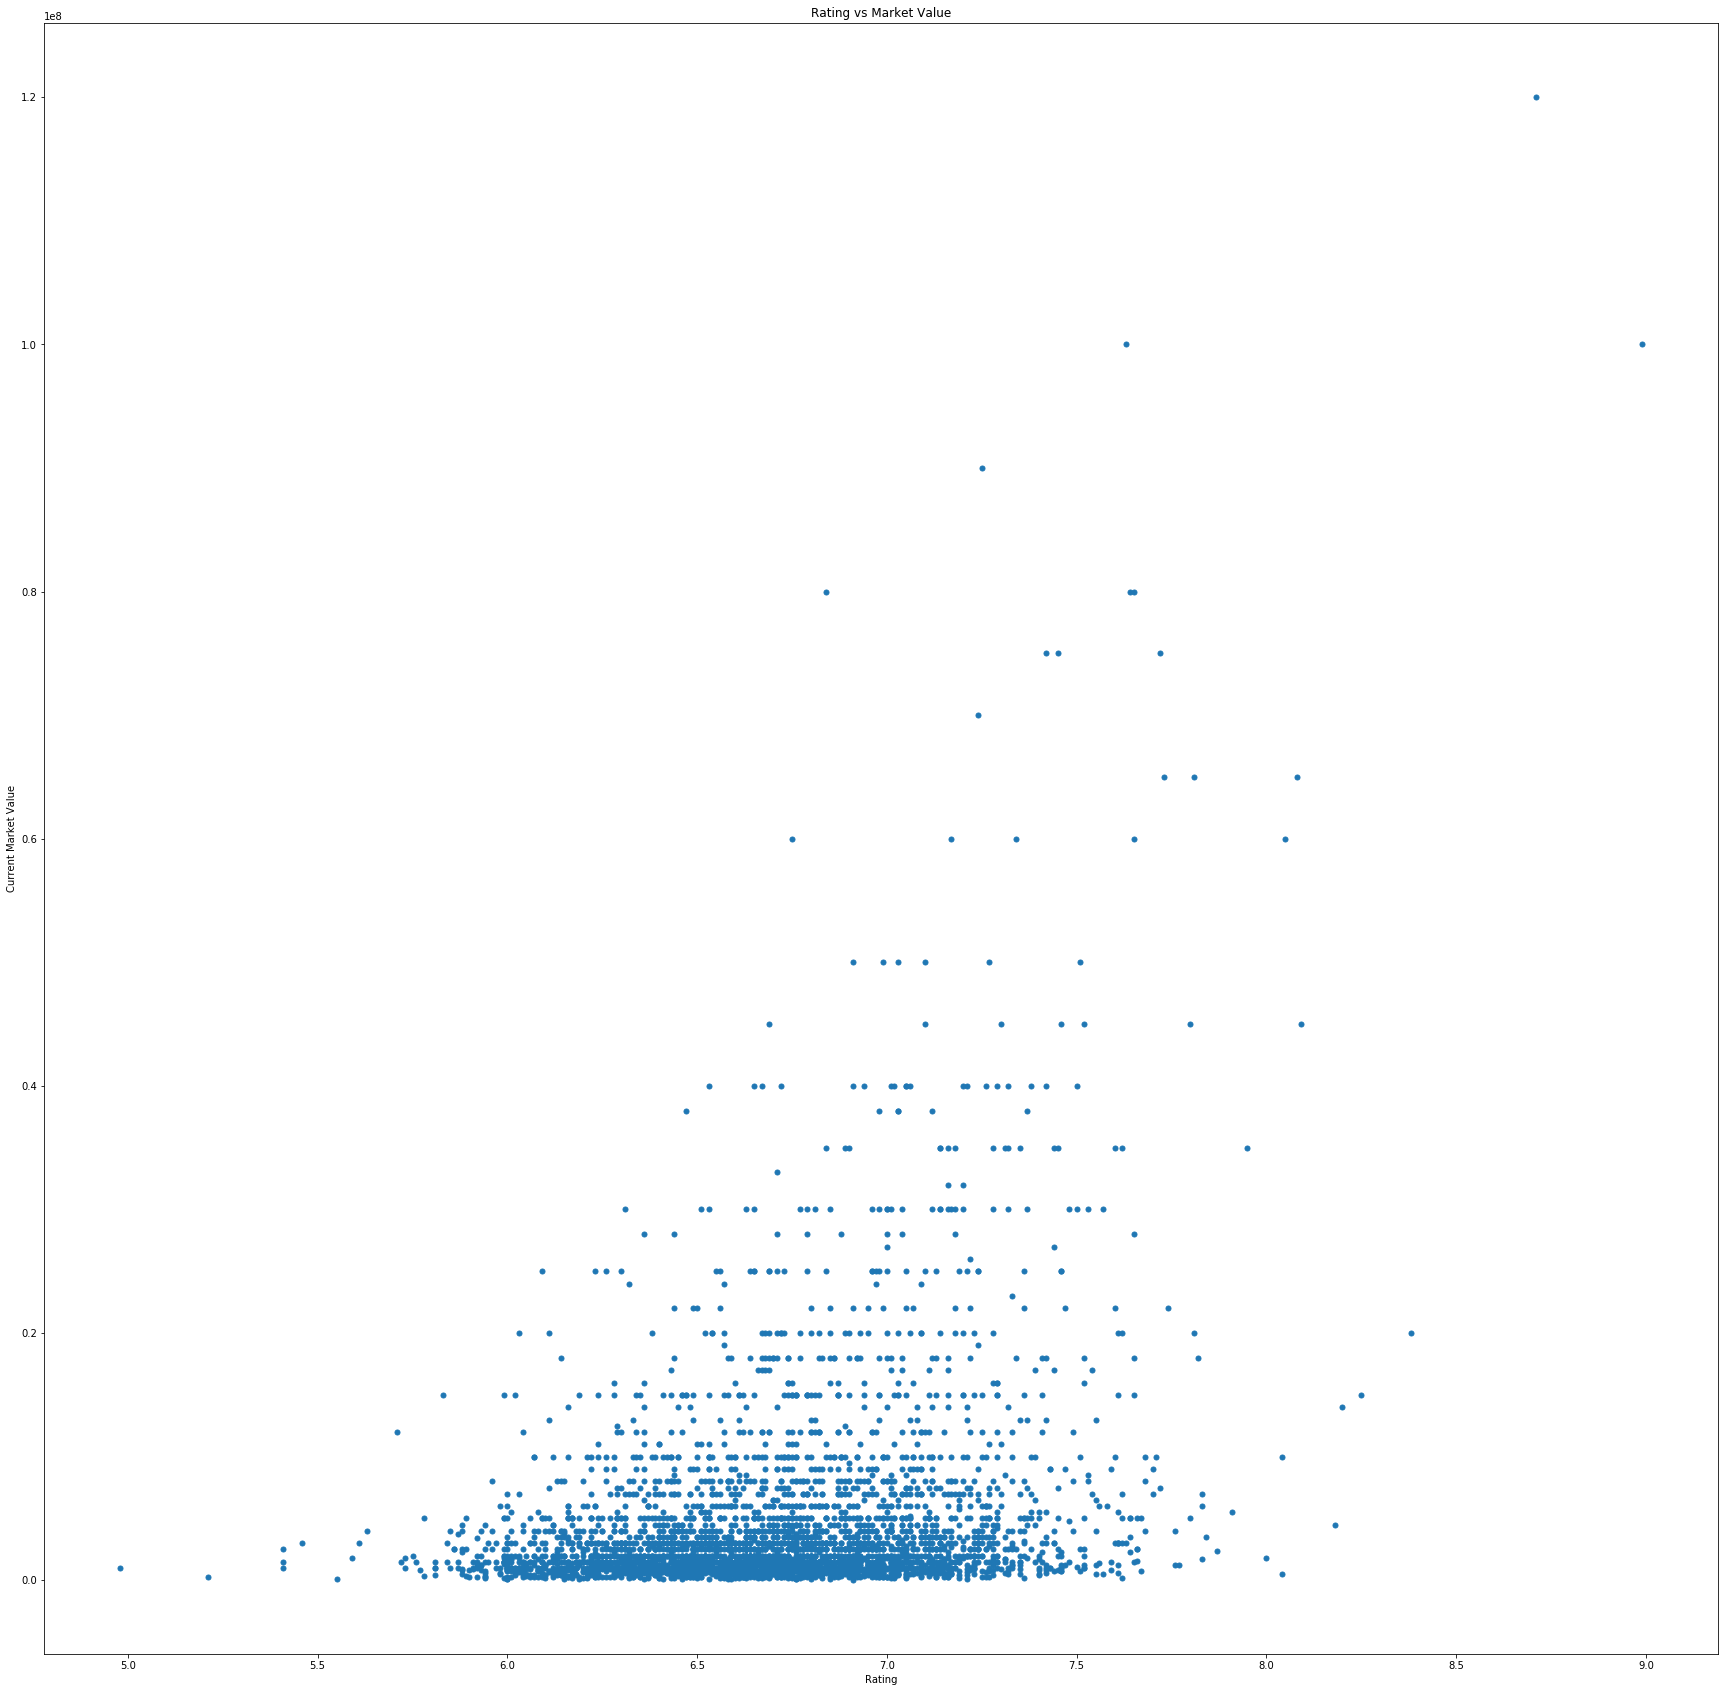

In [108]:
plt.figure(figsize=(30,30))
plt.plot('Rating', 'current_market_value', data=df, linestyle='', marker='o', markersize=5)
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.title('Rating vs Market Value')
plt.show()

In [109]:
df['Rating'].corr(df['current_market_value'])

0.29761334940072981

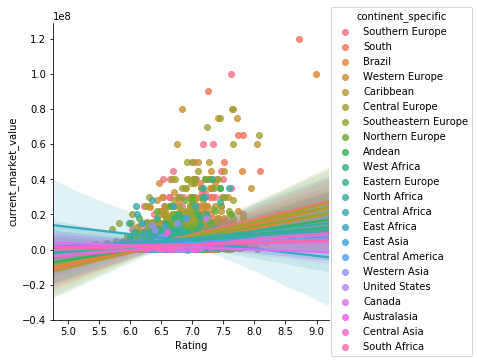

In [110]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="continent_specific", data=df)

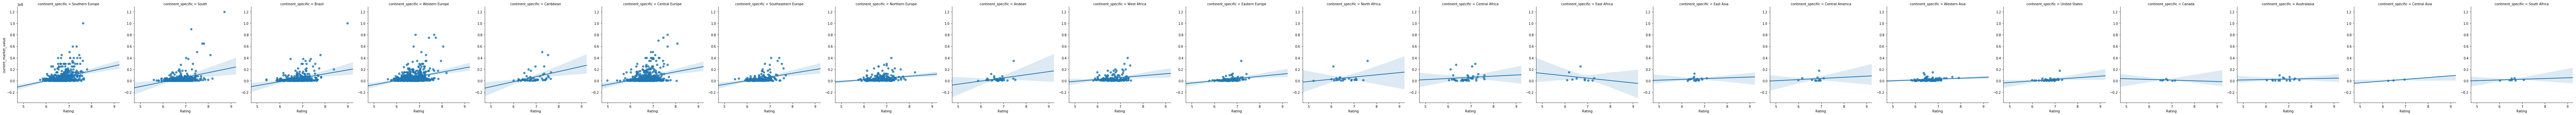

In [111]:
g = sns.lmplot(x="Rating", y="current_market_value", col="continent_specific", data=df)

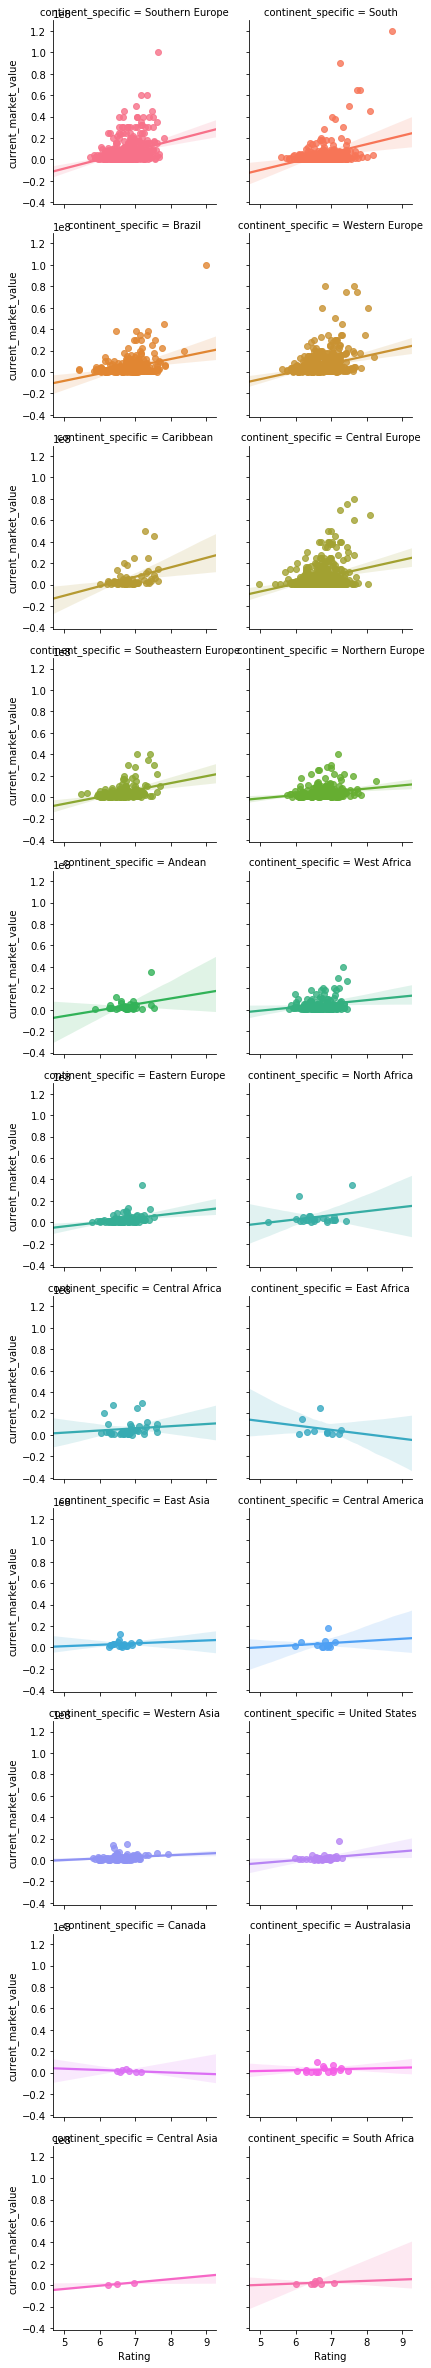

In [112]:
g = sns.lmplot(x="Rating", y="current_market_value", col="continent_specific", hue="continent_specific",
               data=df, col_wrap=2, size=3)

In [113]:
#want to isolate west africa compared to the rest. then west africa compared to Europe or Africa compared to Europe
#df["continent_specific"] = df["Rating"].isin(["West Africa"])
#sns.boxplot(x="Rating", y="current_market_value", hue="continent_specific", data=df, dodge=False)

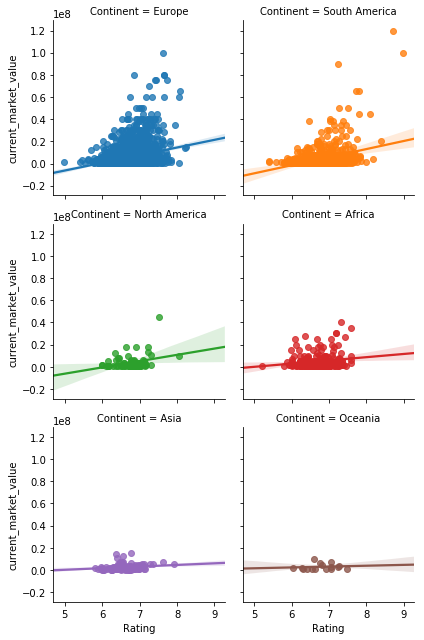

In [114]:
g = sns.lmplot(x="Rating", y="current_market_value", col="Continent", hue="Continent",
               data=df, col_wrap=2, size=3)

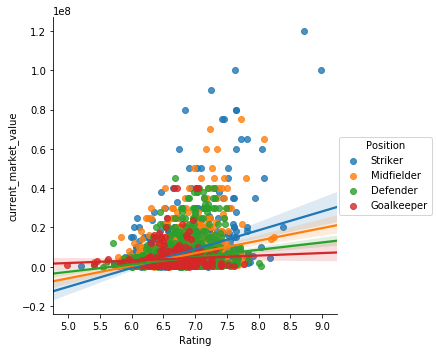

In [115]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="Position", data=df)

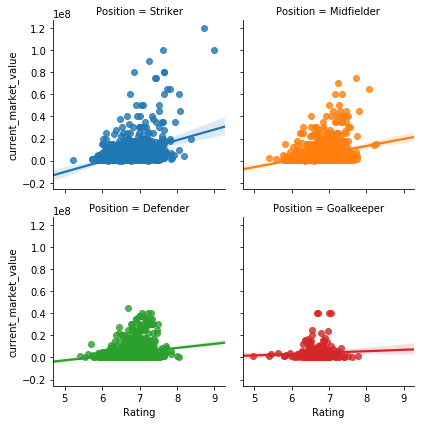

In [116]:
g = sns.lmplot(x="Rating", y="current_market_value", col="Position", hue="Position",
               data=df, col_wrap=2, size=3)

In [117]:
df.dtypes

Name                     object
date_of_birth            object
place_of_birth           object
Age                      object
Height                  float64
Shoe.size               float64
Nationality              object
Position                 object
Foot                     object
current_club             object
current_market_value    float64
highest_market_value    float64
City.of.birth            object
Country.of.birth         object
Birth.country.code       object
Continent                object
continent_specific       object
Player Name              object
GpG                     float64
Assists/90min           float64
Yel/90min               float64
Red/90min               float64
SpG                     float64
PS%                     float64
Rating                  float64
Tackles                 float64
Inter                   float64
Fouls (def)             float64
Offsides                float64
Clear                   float64
DrB (def)               float64
Blocks  